- https://github.com/nashory/gans-awesome-applications
- https://deepmind.com/blog/article/wavenet-generative-model-raw-audio

In [1]:
from fastai.vision.all import *
from fastai.vision.gan import *
import torch

In [2]:
# Setting this to device 2 because it is not in use
torch.cuda.set_device(2)

In [3]:
path = untar_data(URLs.LSUN_BEDROOMS)

In [4]:
size = 64
bs = 128

dblock = DataBlock(
    blocks=(TransformBlock, ImageBlock),
    get_x=generate_noise,
    get_items=get_image_files,
    splitter=IndexSplitter([]),
    item_tfms=Resize((size, size), method=ResizeMethod.Pad),
    batch_tfms=Normalize.from_stats(
        torch.tensor([0.5, 0.5, 0.5]), torch.tensor([0.5, 0.5, 0.5])
    ),
)

dls = dblock.dataloaders(path, path=path, bs=bs)

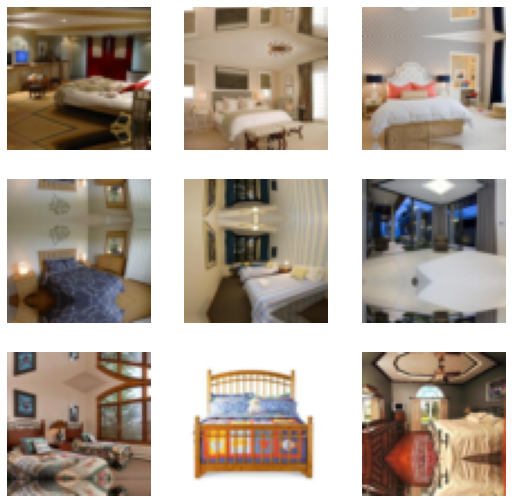

In [5]:
dls.show_batch()

In [6]:
generator = basic_generator(out_size=size, n_channels=3, n_extra_layers=1)
critic = basic_critic(in_size=size, n_channels=3, n_extra_layers=1)
learn = GANLearner.wgan(dls, generator, critic, opt_func=Adam)

In [7]:
learn.recorder.train_metrics = True
learn.recorder.valid_metrics = False
learn.fit(5, 2e-4, wd=0.)

/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
0,-1.169597,0.721604,-1.511383,04:31
1,-1.161587,0.721487,-1.533243,04:30
2,-1.163679,0.720895,-1.534974,04:32
3,-1.164587,0.721182,-1.536060,04:31
4,-1.164525,0.721353,-1.536355,04:31


/opt/mambaforge/envs/cs152/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


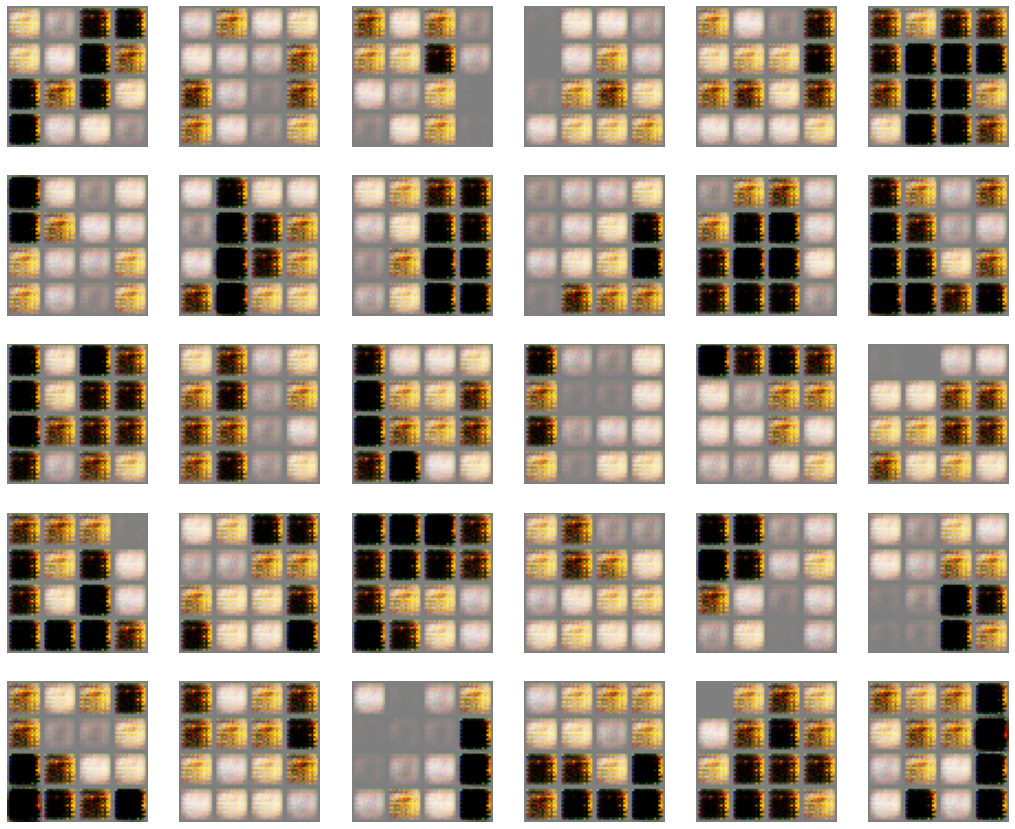

In [8]:
learn.show_results(max_n=30, ds_idx=0)

In [9]:
learn.fit(25, 2e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-1.172135,0.720261,-1.536482,04:27
1,-1.164729,0.721424,-1.536764,04:34
2,-1.164161,0.721469,-1.536862,04:29
3,-1.164757,0.721465,-1.536931,04:19
4,-1.164424,0.721499,-1.537012,04:27
5,-1.164620,0.722179,-1.534910,04:20
6,-1.164806,0.721474,-1.536805,04:23
7,-1.165166,0.721545,-1.537203,04:23
8,-1.164756,0.721521,-1.537056,03:27
9,-1.163904,0.721559,-1.537098,03:11


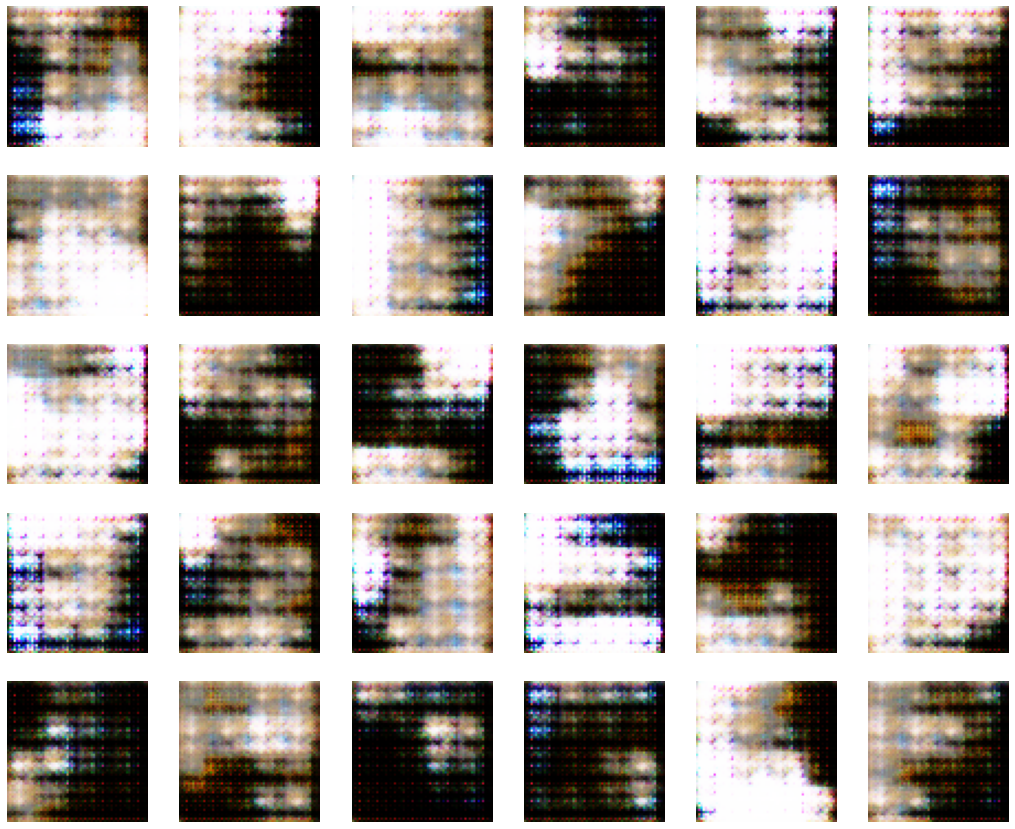

In [10]:
learn.show_results(max_n=30, ds_idx=0)

In [ ]:
learn.export('bedroomgan.pkl')